# Proyecto 03 - Sistemas de Recomendación

## Dataset: STEAM

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Son dos archivos, uno de calificaciones y otro de información sobre los juegos.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset. Sin embargo, **deberás** modificarlas para hacer un mejor manejo de datos. Algunas cosas a las que deberás prestar atención (tal vez no a todas):
1. Tipos de datos: elige tipos de datos apropiados para cada columna.
2. Descartar columnas poco informativas.
3. Guardar en memoria datasets preprocesados para no tener que repetir código que tarde en correr.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿cuáles son los juegos más populares?¿Y los menos populares?

### Filtro Colaborativo

Deberás implementar un sistema de recomendación colaborativo para este dataset. Ten en cuenta:

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.

Puedes implementar un filtro colaborativo a partir de la similitud coseno o índice de Jaccard. ¿Puedes utilizar los métodos de la librería Surprise? Si no es así, busca implementaciones (por ejemplo, nuevas librerías) que sean apropiadas.

Para comenzar a trabajar, puedes asumir que cada entrada es un enlace entre una persona usuaria y un item, **independientemente** de si la crítica es buena o mala. 

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo harías para ponerle un valor a la calificación?
1. ¿Cómo harías para agregar contenido? Por ejemplo, cuentas con el género, precio, fecha de lanzamiento y más información de los juegos.
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import gzip
import pandas as pd

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

### **¿ Qué objetivos hay establecidos con este proyecto ?**

**La idea de este proyecto es crear un sistema de recomendación de filtro colaborativo, utilizando python; funcionará de tal manera qué, según las reviews de cada persona, se haga match con distintos juegos y asi recomendar opciones de juegos similares a los gustos del usuario.**

## ¿ Que representa el dataset ? ¿ Hay información sobre las columnas ?

###**Reviews**

In [ ]:
contador = 0
data_reviews = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
n = 20
for l in parse('/content/drive/MyDrive/Colab Notebooks/steam_reviews.json.gz'):
    if contador%n == 0:
        data_reviews.append(l)
    else:
        pass
    contador += 1


In [ ]:
data_reviews = pd.DataFrame(data_reviews)

**¿ Que representa el dataset ?**


El dataset representa la base de datos de los comentarios que pone la gente sobre los juegos que adquieren en steam, si lo encuentran divertido o no, cuantas horas le dedicaron al mismo y el precio en el que estaba publicando el juego, también figura si tenía algún descuento el mismo o si lo recibieron gratis.

La información que aporto sobre las columnas y como las voy a considerar a continuación:

**DATA_REVIEWS DATASET**

» username: nombre de usuario con el cual entran a la plataforma.

» hours: horas que jugaron al videojuego en evaluación

» products: cantidad de juegos del usuario

» product_id: id del juego a evaluar

» page_order: orden de la página.

» date: fecha de el comentario.

» text: comentario hecho por el usuario.

» early_access: acceso anticipado, si o no.

» page: página.

» user_id: id de usuario (irrepetible)

» compensation: si tuvo ventaja a la hora de obtener el juego.

###» **found_funny:** valoración del juego de carácter acumulativa; los usuarios suelen saltarse este tipo de valoración, por ende, esta variable contiene muchos nan (los transformaremos en 0). Se puede decir que found funny dentro de steam, nos puede aparecer varias veces por mas que ya hayamos votado que el juego nos parece divertido, eso nos avisa que una persona intencionalmente puede buscar votar una infinidad de veces positivamente el juego, para generar alguna repercusión, así que aplicando filtrados correspondientes podremos dejar de lado esas jugadas sucias.



▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓







**Visualización de datos NA.**

In [ ]:
data_reviews.isna().sum()

username             0
hours             1322
products           773
product_id           0
page_order           0
date                 0
text                 0
early_access         0
page                 0
user_id         231160
found_funny     329763
compensation    382397
dtype: int64

**Dataset head.**

In [ ]:
data_reviews.head()

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,found_funny,compensation
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,freakfantom,0.1,1706.0,725280,5,2017-11-12,Прикольная стрелялка. Взял дешево на распродаже.,False,1,NaN,NaN,NaN
2,the_maker988,8.2,18.0,35140,7,2018-01-02,"This game was way to linear for me, and compar...",False,1,76561198353396844,NaN,NaN
3,Vonder,2.7,264.0,35600,3,2017-04-15,I like the art style and the idea but what a b...,False,1,76561198113497324,NaN,NaN
4,rampage1209,34.8,3.0,1840,4,2018-01-04,WAY PAST COOL,False,1,76561198080474371,NaN,NaN


**Dataset tail.**

In [ ]:
data_reviews.tail()

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,found_funny,compensation
389649,Slavic Psycho,3.9,135.0,252490,1,2013-12-11,never seen anything like this,True,10213,NaN,NaN,NaN
389650,Tupac ;),1460.4,195.0,252490,1,2013-12-11,Great game!,True,10215,76561197981068109,NaN,NaN
389651,Vidaar,783.5,353.0,252490,1,2013-12-11,Summary: Rust is a survival game created by Fa...,True,10217,NaN,NaN,NaN
389652,RancorZealot,203.5,173.0,252490,1,2013-12-11,Should you buy RUST? Uh... YES. The BEST Survi...,True,10219,76561197963920623,NaN,NaN
389653,Helk,15375.0,98.0,252490,1,2013-12-11,I love this game!,True,10221,NaN,36.0,NaN


**Cuántos datos y columnas tiene:**

In [ ]:
print("El dataset tiene {} datos y {} columnas".format(data_reviews.shape[0], data_reviews.shape[1]))

El dataset tiene 389654 datos y 12 columnas


**Sus datos estadísticos principales:**

In [ ]:
display(data_reviews.describe())

,hours,products,page_order,page,found_funny
count,388332.000000,388881.000000,389654.000000,389654.000000,59891.000000
mean,111.655317,237.388368,4.417373,893.017087,8.092000
std,391.173007,488.970218,2.897673,1927.905445,78.082516
min,0.000000,1.000000,0.000000,1.000000,1.000000
25%,4.000000,45.000000,2.000000,52.000000,1.000000
50%,15.400000,110.000000,4.000000,237.000000,1.000000
75%,59.300000,246.000000,7.000000,830.000000,3.000000
max,28164.000000,12832.000000,9.000000,18371.000000,6277.000000


FOUND_FUNNY MAX = 6277.000000 (EXTREMADAMENTE ALTO)

###**Games**

In [ ]:
data_games = []
for l in parse('/content/drive/MyDrive/Colab Notebooks/steam_games.json.gz'):
    data_games.append(l)
data_games = pd.DataFrame(data_games)

**DATA_GAMES DATASET**

*¿ Hay información sobre las columnas ?*

» publisher: la compañía que publicó oficialmente el juego.

» genres: generos a los que se hace alusión en el juego.

» app_name: nombre del juego

» title: título de la saga de juegos si es que la tiene.

» url: url para obtener el juego

» release_date: fecha de lanzamiento del juego

» tags: que palabras hacen alusión al juego

» discount_price: descuento si es que tiene

» reviews_url: url del comentario

» specs: especifícaciones del juego

» price: precio

» early_access: si alguien tuvo acceso anticipado

» id: id irrepetible del juego

» developer: desarrollador del juego

» sentiment: sentimiento encontrado en la gente

### » **metascore:** el metascore es algo relativo, bastante importante según se lo vea, el metascore es un numero que nos arroja metacritics(https://www.metacritic.com/), que es una página de criticas, que lo que realiza es juntar todas las criticas hacia el juego por ejemplo, y sacar un promedio, se dice que las compañias de juegos, realizan estratégias en internet para manipular los metascore finales de esta reconocida página.

**Visualización de datos NA.**

In [ ]:
data_games.isna().sum()

publisher          8052
genres             3283
app_name              2
title              2050
url                   0
release_date       2067
tags                163
discount_price    31910
reviews_url           2
specs               670
price              1377
early_access          0
id                    2
developer          3299
sentiment          7182
metascore         29458
dtype: int64

**Dataset head.**

In [ ]:
data_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


**Dataset tail.**

In [ ]:
data_games.tail()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
32130,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",1.49,http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS""",NaN,NaN
32131,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",4.24,http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada,NaN,NaN
32132,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",1.39,http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich,NaN,NaN
32133,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",NaN,http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns",1 user reviews,NaN
32134,NaN,NaN,Maze Run VR,NaN,http://store.steampowered.com/app/681550/Maze_...,NaN,"[Early Access, Adventure, Indie, Action, Simul...",NaN,http://steamcommunity.com/app/681550/reviews/?...,"[Single-player, Stats, Steam Leaderboards, HTC...",4.99,True,681550,NaN,Positive,NaN


**Consultando algunos juegos.**

In [ ]:
data_games[data_games.id == '76561198382309565']

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
31617,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,http://store.steampowered.com/app/35140/Batman...,2010-03-26,"[Action, Batman, Stealth, Adventure, Third Per...",NaN,http://steamcommunity.com/app/35140/reviews/?b...,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,35140,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91


In [ ]:
data_reviews[data_reviews.product_id == '35140']

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,found_funny,compensation
2,the_maker988,8.2,18.0,35140,7,2018-01-02,"This game was way to linear for me, and compar...",False,1,76561198353396844,NaN,NaN
9,MLGarbage,9.5,38.0,35140,1,2018-01-02,Fun Game. I played shadow of mordor before pla...,False,2,76561198292325099,NaN,NaN
18,Brookie,16.1,14.0,35140,3,2017-12-31,Absolutely dark as a bag. Love this game.,False,3,76561198382309565,NaN,NaN
19,anotherphysicsgradstudent,56.9,95.0,35140,7,2017-12-31,"It may be close to a decade old, but don't let...",False,3,76561198131701503,NaN,NaN
28,BouncedBadger123,54.2,200.0,35140,6,2017-12-29,"Good story and graphics for 2009, only downsid...",False,4,76561198265084773,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5753,Tyber83,25.2,1093.0,35140,8,2010-12-19,Everyone wants to be Batman. Don't deny it. Hi...,False,903,NaN,NaN,NaN
5788,doctor 7,50.9,1093.0,35140,4,2010-12-18,I'm Batman (and you can be too!),False,904,NaN,NaN,NaN
5789,0ddity,26.4,180.0,35140,5,2010-12-13,"If you like Batman at all, even a little bit, ...",False,905,NaN,NaN,NaN
5790,Lord JoJo T.,18.2,970.0,35140,5,2010-12-01,You get to play the Batman and beat the♥♥♥♥♥♥o...,False,906,NaN,NaN,NaN


**Cuántos datos y columnas tiene:**

In [ ]:
print("El dataset tiene {} datos y {} columnas".format(data_games.shape[0], data_games.shape[1]))

El dataset tiene 32135 datos y 16 columnas


###**¿ Cuáles son los 10 juegos que mas reviews repiten en el dataset ?**

In [ ]:
for i in range(0, 9):
  print(data_games[data_games.id==str(data_reviews.product_id.value_counts().index[i])].title.values)

['Team Fortress 2']
['Rust']
['Borderlands 2']
['Fallout 4']
['Grand Theft Auto V']
['Undertale']
['DayZ']
['Portal 2']
['Robocraft']


###Primero para ordenar un poco los datasets, voy a hacer algunos drop de columnas.

In [ ]:
games = data_games[["title", "genres", "metascore", "id"]]

In [ ]:
games.columns = ["title", "genres", "metascore", "product_id"]

In [ ]:
games

,title,genres,metascore,product_id
0,Lost Summoner Kitty,"[Action, Casual, Indie, Simulation, Strategy]",NaN,761140
1,Ironbound,"[Free to Play, Indie, RPG, Strategy]",NaN,643980
2,Real Pool 3D - Poolians,"[Casual, Free to Play, Indie, Simulation, Sports]",NaN,670290
3,弹炸人2222,"[Action, Adventure, Casual]",NaN,767400
4,NaN,NaN,NaN,773570
...,...,...,...,...
32130,Colony On Mars,"[Casual, Indie, Simulation, Strategy]",NaN,773640
32131,LOGistICAL: South Africa,"[Casual, Indie, Strategy]",NaN,733530
32132,Russian Roads,"[Indie, Racing, Simulation]",NaN,610660
32133,EXIT 2 - Directions,"[Casual, Indie]",NaN,658870


A continuación, sincronizaré los dos datasets, para que cada usuario tenga por juego, su valor de found funny, su valor de metascore y los generos del mismo juego (todo esto acompañado de una id unica de usuario y de juego)

In [ ]:
data_reviews1 = pd.merge(data_reviews, games, left_on='product_id', right_on="product_id")

In [ ]:
data_reviews1

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,found_funny,compensation,title,genres,metascore
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN,Psi Project,"[Action, Adventure, Indie, Simulation]",NaN
1,freakfantom,0.1,1706.0,725280,5,2017-11-12,Прикольная стрелялка. Взял дешево на распродаже.,False,1,NaN,NaN,NaN,Psi Project,"[Action, Adventure, Indie, Simulation]",NaN
2,the_maker988,8.2,18.0,35140,7,2018-01-02,"This game was way to linear for me, and compar...",False,1,76561198353396844,NaN,NaN,Batman: Arkham Asylum Game of the Year Edition,"[Action, Adventure]",91
3,MLGarbage,9.5,38.0,35140,1,2018-01-02,Fun Game. I played shadow of mordor before pla...,False,2,76561198292325099,NaN,NaN,Batman: Arkham Asylum Game of the Year Edition,"[Action, Adventure]",91
4,Brookie,16.1,14.0,35140,3,2017-12-31,Absolutely dark as a bag. Love this game.,False,3,76561198382309565,NaN,NaN,Batman: Arkham Asylum Game of the Year Edition,"[Action, Adventure]",91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389972,DUW2PAG,50.2,384.0,518790,3,2017-02-16,"Massive fan of theHunter classic, Super hyped ...",False,376,76561198055593926,NaN,NaN,theHunter: Call of the Wild™,"[Adventure, Simulation, Sports]",NaN
389973,Zeek,381.5,7.0,518790,4,2017-02-16,Pretty good so far!\nAwesome bow hunting!\nonc...,False,380,NaN,NaN,NaN,theHunter: Call of the Wild™,"[Adventure, Simulation, Sports]",NaN
389974,rt974,9.4,36.0,518790,3,2017-02-16,"Hi,\nI discovered this game yesterday on my pe...",False,381,76561198032901419,NaN,NaN,theHunter: Call of the Wild™,"[Adventure, Simulation, Sports]",NaN
389975,Fallenglory,35.8,606.0,518790,3,2017-02-16,The Hunter was and is still the most realistic...,False,382,76561197992526609,2.0,NaN,theHunter: Call of the Wild™,"[Adventure, Simulation, Sports]",NaN


**DATA REVIEWS.**

In [ ]:
data_reviews2 = data_reviews1[["user_id", "product_id", "found_funny", "metascore", "hours", "title", "text", "genres"]]

In [ ]:
data_reviews2.iloc[3943]

user_id                                          NaN
product_id                                    427730
found_funny                                      NaN
metascore                                        NaN
hours                                            3.5
title                               Who's Your Daddy
text           I don't know my dad, THIS GAM iz meen
genres                       [Action, Casual, Indie]
Name: 3943, dtype: object

**found_funny deberá ser rellenado con 0 en sus valores nan, ya que es información valiosa que no debemos perder.**

In [ ]:
data_reviews2["found_funny"].fillna(0, inplace=True)
data_reviews2["product_id"].dropna(inplace=True)
data_reviews2["metascore"].dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Hacemos el drop de NA de la columna hours, debido a que probablemente sean cuentas que tiene 0 horas jugadas, pero, de todas formas dejaron un comentario, el cual esta sesgado.**

In [ ]:
data_reviews2.dropna(subset = ["hours"], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print(data_reviews2.shape)

(388655, 8)


In [ ]:
data_reviews2.product_id = data_reviews2.product_id.replace(["NA"],np.nan)
data_reviews2.product_id = data_reviews2.metascore.replace(["NA"],np.nan)
data_reviews2 = data_reviews2[~data_reviews2.product_id.isna()]
data_reviews2 = data_reviews2[~data_reviews2.user_id.isna()]
data_reviews2 = data_reviews2[~data_reviews2.metascore.isna()]
data_reviews2 = data_reviews2[~data_reviews2.genres.isna()]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
print(data_reviews2.shape)

(93440, 8)


In [ ]:
data_reviews2

,user_id,product_id,found_funny,metascore,hours,title,text,genres
2,76561198353396844,91.0,0.0,91,8.2,Batman: Arkham Asylum Game of the Year Edition,"This game was way to linear for me, and compar...","[Action, Adventure]"
3,76561198292325099,91.0,0.0,91,9.5,Batman: Arkham Asylum Game of the Year Edition,Fun Game. I played shadow of mordor before pla...,"[Action, Adventure]"
4,76561198382309565,91.0,0.0,91,16.1,Batman: Arkham Asylum Game of the Year Edition,Absolutely dark as a bag. Love this game.,"[Action, Adventure]"
5,76561198131701503,91.0,0.0,91,56.9,Batman: Arkham Asylum Game of the Year Edition,"It may be close to a decade old, but don't let...","[Action, Adventure]"
6,76561198265084773,91.0,0.0,91,54.2,Batman: Arkham Asylum Game of the Year Edition,"Good story and graphics for 2009, only downsid...","[Action, Adventure]"
...,...,...,...,...,...,...,...,...
389710,76561198073243816,79.0,0.0,79,11.9,Life is Strange: Before the Storm,Wow... It is definitely different from the ori...,"[Action, Adventure]"
389713,76561197980301339,79.0,0.0,79,18.3,Life is Strange: Before the Storm,Hella great.,"[Action, Adventure]"
389788,76561198276798449,49.0,0.0,49,4.7,Guards,"First of all, I want to note the style of figh...","[Adventure, Indie, Strategy]"
389789,76561197992674721,49.0,0.0,49,5.8,Guards,"A pure GEM !!!\nIdle turn based game, just swi...","[Adventure, Indie, Strategy]"


**Visualización de datos NA.**

In [ ]:
data_reviews2.isna().sum()

user_id        0
product_id     0
found_funny    0
metascore      0
hours          0
title          0
text           0
genres         0
dtype: int64

**Tratamiento de outliers:**

Aparentemente la variable found_funny que será nuestro target, está muy sesgada, cualquier persona puede darle manito arriba en found_funny reiteradas veces, cuantas quiera, entonces hay que adoptar un criterio para tratar esos outliers.
Si un juego nos gusta demasiado, hablando dentro de parametros reales, uno mas de 30 veces (como muchísimo) no le daría manito arriba a un juego..

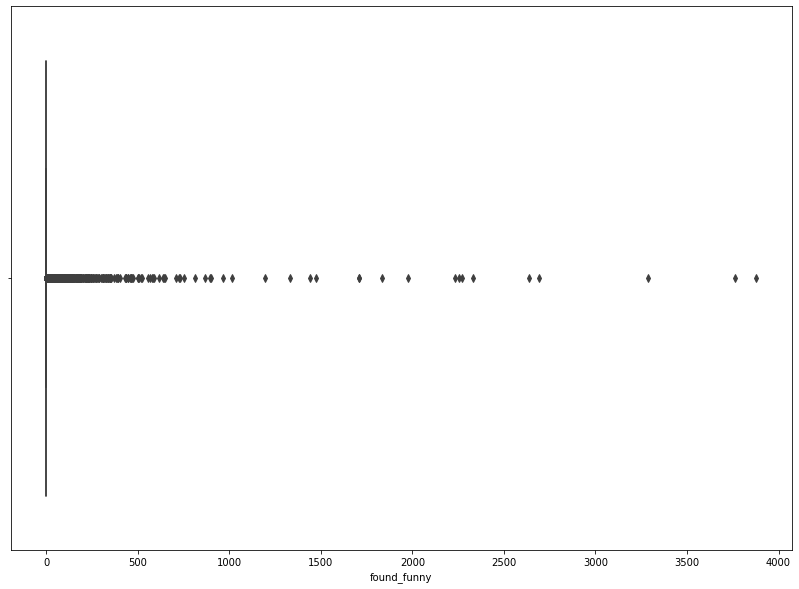

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x=data_reviews2[~data_reviews2["found_funny"].isna()]["found_funny"])

In [ ]:
data_reviews2 = data_reviews2[(data_reviews2.found_funny <= 20)]

Se eligió el número 20 por criterio propio.

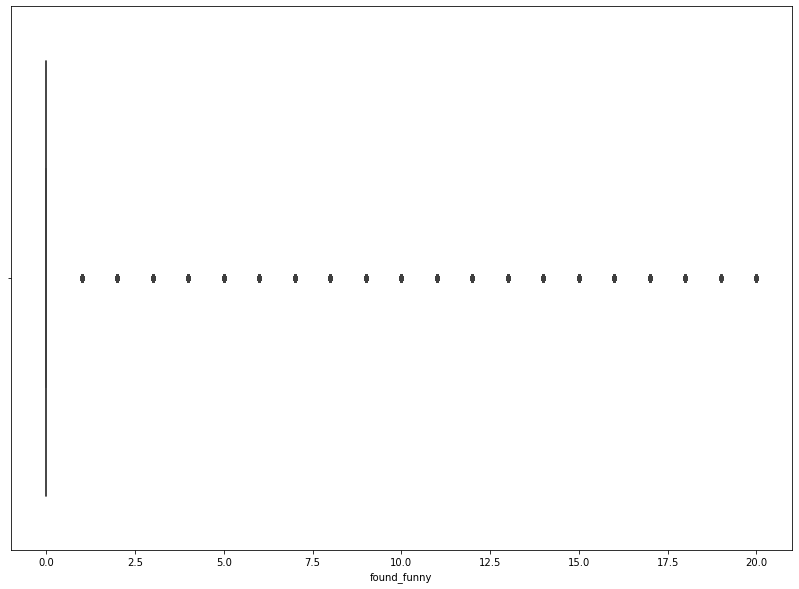

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x=data_reviews2[~data_reviews2["found_funny"].isna()]["found_funny"])

Con la variable hours sucede lo mismo, tiene muchos outliers, pero aquí entra en juego mi experiencia como usuario en steam, yo personalmente tengo mas de 2000 y 3000 horas en distintos juegos dentro de steam, tengo además, usuarios amigos agregados dentro de la plataforma que también comparten esa cantidad de horas y aún más, por lo tanto optaré por colocar un tope de 5000hs, porque si bien conozco gente que tiene más horas, ya pasarían a ser los menos.

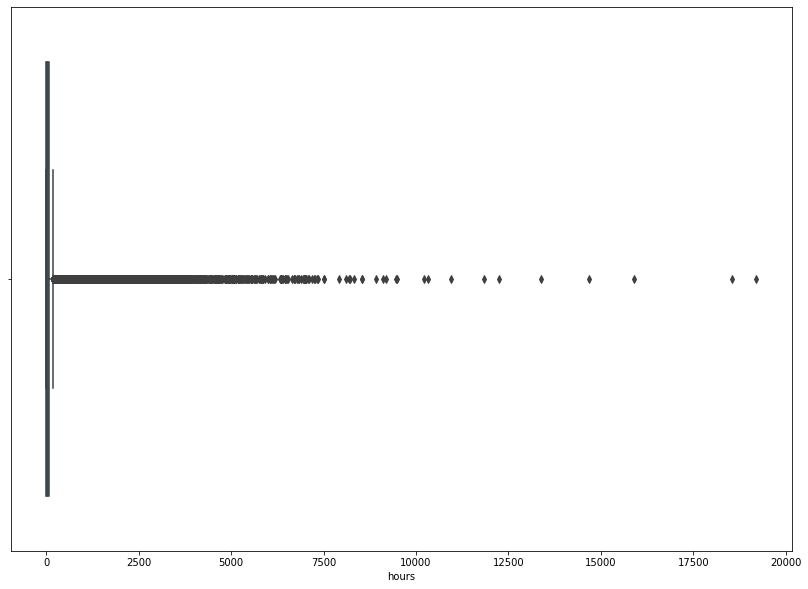

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x=data_reviews2[~data_reviews2["hours"].isna()]["hours"])

In [ ]:
data_reviews2 = data_reviews2[(data_reviews2.hours <= 5000) & (data_reviews2.hours >= 3)]

En base a mi experiencia como player, con tan solo tres horas de gameplay dentro de un juego, ya se puede dar una cierta impresíon o valorización.

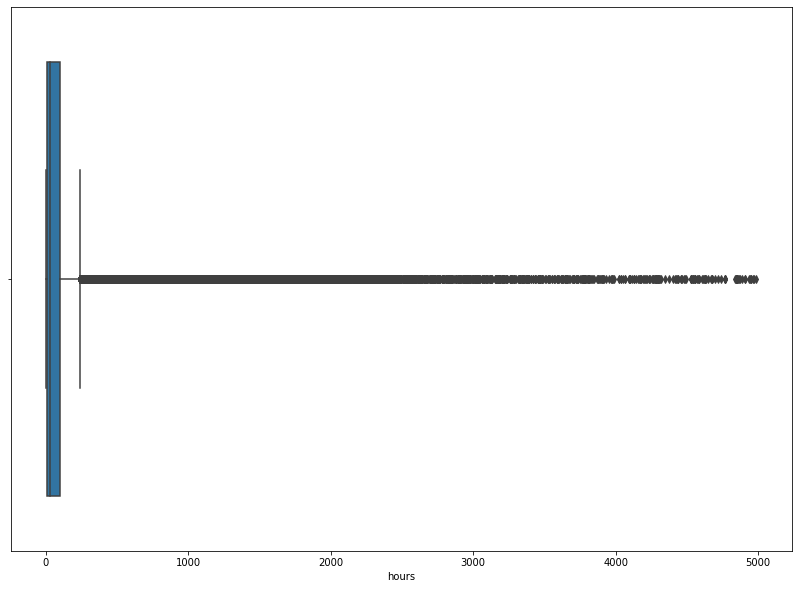

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x=data_reviews2[~data_reviews2["hours"].isna()]["hours"])

A continuación se verán como estan distribuidos los valores de found_funny.

<Figure size 720x1440 with 0 Axes>

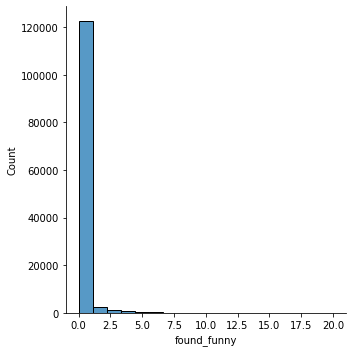

In [ ]:
plt.figure(figsize=(10,20))
sns.displot(x=data_reviews2['found_funny'])

In [ ]:
# Vamos a tratar la columna de generos.
data_reviews2.dropna(subset = ["genres"], inplace=True)

In [ ]:
data_reviews3 = data_reviews2.copy()

In [ ]:
data_reviews4 = data_reviews2.copy()

Aqui lo que haremos es encodear las variables de generos.

In [ ]:
for index, row in data_reviews3.iterrows():
  for genres in row["genres"]:
    data_reviews3.at[index, genres] = 1


In [ ]:
for index, row in data_reviews4.iterrows():
  for genres in row["genres"]:
    data_reviews4.at[index, genres] = 1

Llenamos de 0 las variables de encodeo que estan con nan.

In [ ]:
data_reviews3 = data_reviews3.fillna(0)

In [ ]:
data_reviews4 = data_reviews4.fillna(0)

In [ ]:
data_reviews4.isna().sum()

user_id                  0
product_id               0
found_funny              0
metascore                0
hours                    0
title                    0
text                     0
genres                   0
Action                   0
Adventure                0
Casual                   0
Indie                    0
RPG                      0
Strategy                 0
Simulation               0
Sports                   0
Free to Play             0
Racing                   0
Massively Multiplayer    0
Early Access             0
dtype: int64

In [ ]:
data_reviews3

,user_id,product_id,found_funny,metascore,hours,title,text,genres,Action,Adventure,Casual,Indie,RPG,Strategy,Simulation,Sports,Free to Play,Racing,Massively Multiplayer,Early Access
2,76561198353396844,91.0,0.0,91,8.2,Batman: Arkham Asylum Game of the Year Edition,"This game was way to linear for me, and compar...","[Action, Adventure]",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76561198292325099,91.0,0.0,91,9.5,Batman: Arkham Asylum Game of the Year Edition,Fun Game. I played shadow of mordor before pla...,"[Action, Adventure]",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,76561198382309565,91.0,0.0,91,16.1,Batman: Arkham Asylum Game of the Year Edition,Absolutely dark as a bag. Love this game.,"[Action, Adventure]",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,76561198131701503,91.0,0.0,91,56.9,Batman: Arkham Asylum Game of the Year Edition,"It may be close to a decade old, but don't let...","[Action, Adventure]",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,76561198265084773,91.0,0.0,91,54.2,Batman: Arkham Asylum Game of the Year Edition,"Good story and graphics for 2009, only downsid...","[Action, Adventure]",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389710,76561198073243816,79.0,0.0,79,11.9,Life is Strange: Before the Storm,Wow... It is definitely different from the ori...,"[Action, Adventure]",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389713,76561197980301339,79.0,0.0,79,18.3,Life is Strange: Before the Storm,Hella great.,"[Action, Adventure]",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389788,76561198276798449,49.0,0.0,49,4.7,Guards,"First of all, I want to note the style of figh...","[Adventure, Indie, Strategy]",0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
389789,76561197992674721,49.0,0.0,49,5.8,Guards,"A pure GEM !!!\nIdle turn based game, just swi...","[Adventure, Indie, Strategy]",0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_reviews4

,user_id,product_id,found_funny,metascore,hours,title,text,genres,Action,Adventure,Casual,Indie,RPG,Strategy,Simulation,Sports,Free to Play,Racing,Massively Multiplayer,Early Access
2,76561198353396844,91.0,0.0,91,8.2,Batman: Arkham Asylum Game of the Year Edition,"This game was way to linear for me, and compar...","[Action, Adventure]",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76561198292325099,91.0,0.0,91,9.5,Batman: Arkham Asylum Game of the Year Edition,Fun Game. I played shadow of mordor before pla...,"[Action, Adventure]",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,76561198382309565,91.0,0.0,91,16.1,Batman: Arkham Asylum Game of the Year Edition,Absolutely dark as a bag. Love this game.,"[Action, Adventure]",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,76561198131701503,91.0,0.0,91,56.9,Batman: Arkham Asylum Game of the Year Edition,"It may be close to a decade old, but don't let...","[Action, Adventure]",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,76561198265084773,91.0,0.0,91,54.2,Batman: Arkham Asylum Game of the Year Edition,"Good story and graphics for 2009, only downsid...","[Action, Adventure]",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389710,76561198073243816,79.0,0.0,79,11.9,Life is Strange: Before the Storm,Wow... It is definitely different from the ori...,"[Action, Adventure]",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389713,76561197980301339,79.0,0.0,79,18.3,Life is Strange: Before the Storm,Hella great.,"[Action, Adventure]",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389788,76561198276798449,49.0,0.0,49,4.7,Guards,"First of all, I want to note the style of figh...","[Adventure, Indie, Strategy]",0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
389789,76561197992674721,49.0,0.0,49,5.8,Guards,"A pure GEM !!!\nIdle turn based game, just swi...","[Adventure, Indie, Strategy]",0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# MACHINE LEARNING

Reordenamos nuestra futura data de entrenamiento.

In [ ]:
data_train = data_reviews3[["user_id", "product_id", "found_funny", "hours","Action","Adventure","Casual","RPG","Strategy","Free to Play","Massively Multiplayer","Indie","Early Access","Simulation","Sports","Racing"]]

In [ ]:
data_train1 = data_reviews4[["user_id", "product_id", "metascore", "hours","Action","Adventure","Casual","RPG","Strategy","Free to Play","Massively Multiplayer","Indie","Early Access","Simulation","Sports","Racing"]]

In [ ]:
data_train

,user_id,product_id,found_funny,hours,Action,Adventure,Casual,RPG,Strategy,Free to Play,Massively Multiplayer,Indie,Early Access,Simulation,Sports,Racing
2,76561198353396844,91.0,0.0,8.2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76561198292325099,91.0,0.0,9.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,76561198382309565,91.0,0.0,16.1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,76561198131701503,91.0,0.0,56.9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,76561198265084773,91.0,0.0,54.2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389710,76561198073243816,79.0,0.0,11.9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389713,76561197980301339,79.0,0.0,18.3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389788,76561198276798449,49.0,0.0,4.7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
389789,76561197992674721,49.0,0.0,5.8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


La librería a usar para los modelos sera surprise de scikit.

In [ ]:
!pip install surprise

In [ ]:
from surprise import Dataset
from surprise import Reader

Reader contendra el rango en el que va nuestro por asi decir "rating"

In [ ]:
reader = Reader(rating_scale=(1,20))

Aca le indicamos a data, cual es la id de usuario única, cual es la id de producto única, y cual es la variable que contiene el rating.

In [ ]:
data = Dataset.load_from_df(data_train[['user_id', 'product_id', 'found_funny']], reader)

In [ ]:
from surprise import SVD
from surprise.model_selection import train_test_split

In [ ]:
trainset, testset = train_test_split(data, test_size=.25)

In [ ]:
Creamos la variable que contiene el algoritmo.

In [ ]:
# Use the famous SVD algorithm.
algo = SVD()

Lo entrenamos con nuestro conjunto de entrenamiento

In [ ]:
algo.fit(trainset)

Hacemos las predicciones del conjunto de testeo

In [ ]:
predictions = algo.test(testset)

In [ ]:
usuario = 76561198382309565

Ahora veamos como predice nuestro algoritmo.

**Ahora a continuación veremos cuanto rmse nos da este algoritmo:**"

In [ ]:
from surprise import accuracy

In [ ]:
accuracy.rmse(predictions)

Trataremos de mejorarlo tuneando el modelo:

In [ ]:
from surprise import SVD,NormalPredictor
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors':[50,100,150],'n_epochs':[20,30],  'lr_all':[0.005,0.01],'reg_all':[0.02,0.1]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)
params = gs.best_params['rmse']
svdtuned = SVD(n_factors=params['n_factors'], n_epochs=params['n_epochs'],lr_all=params['lr_all'], reg_all=params['reg_all'])

In [ ]:
gs.best_params

{'rmse': {'lr_all': 0.005, 'n_epochs': 20, 'n_factors': 150, 'reg_all': 0.1}}

In [ ]:
gs.best_score

{'rmse': 1.4186956058126619}

El modelo mejoró considerablemente, pero ahora, ¿a qué lo podemos comparar?

Lo que se hizo a continuación, fue crear otro algoritmo de svd, pero esta vez usando de variable de rating a METASCORE, como dijimos el metascore segun nuestra investigación, no es tan relevante a la hora de predecir, ya que realmente a la hora de poner un puntuaje sigue siendo un promedio de distintas páginas de criticas de juegos en internet, y yo no he visto si esos promedios, a la hora de sacarlos, han hecho un EDA correspondiente a sus datos, y ya de por si con la mala fama que tiene metacritics, me alcanza como para saber que no tendra buenos resultados.
**En fin hice el modelo simplemente para aprender cuanto daría por mas que no tenga validez y estos fueron los resultados**

In [ ]:
reader1 = Reader(rating_scale=(1,100))

In [ ]:
data1 = Dataset.load_from_df(data_train1[['user_id', 'product_id', 'metascore']], reader1)

In [ ]:
trainset1, testset1 = train_test_split(data1, test_size=.25)

In [ ]:
# Use the famous SVD algorithm.
algo1 = SVD()

In [ ]:
algo1.fit(trainset1)

In [ ]:
predictions1 = algo1.test(testset1)

**Accuracy rmse final del modelo svd con metascore en el rating:**

In [ ]:
accuracy.rmse(predictions1)

RMSE: 1.6956


1.6955859284237322

## Modelo benchmark.

Vamos a comparar el algoritmo svd con otro modelo de la librería surprise, el cual es SVD++, vamos a ver que resultados obtenemos.

In [ ]:
### Usando SVD ++
from surprise import SVDpp
from surprise.model_selection import cross_validate
algo = SVDpp()

In [ ]:
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3)
print(perf)

{'test_rmse': array([1.27020087, 1.28664196, 1.26218712]), 'test_mae': array([1.00508583, 1.00352723, 1.0020374 ]), 'fit_time': (5.826747179031372, 5.825524806976318, 5.797525882720947), 'test_time': (0.2934384346008301, 0.3098878860473633, 0.2714695930480957)}


**Sin un tuneo de hiper-parámetros obtuvimos mejores resultados que con el SVD tuneado.**


**Accuracy rmse svd con grid search: 1.4186956058126619**

**Accuracy rmse svd++ sin grid search: 1.26218712**

# INVESTIGACIÓN
### COMO PREDICE NUESTRO ALGORITMO?



Procedo a guardar en un dataset información de el id de los productos y su respectivo nombre.

In [ ]:
recomendaciones_usuario = data_games[['game','product_id']].iloc[:4499].copy()
recomendaciones_usuario.index = recomendaciones_usuario.product_id
recomendaciones_usuario = recomendaciones_usuario.drop(['product_id'], axis=1)
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(4499, 1)


,game
product_id,
761140,Lost Summoner Kitty
643980,Ironbound
670290,Real Pool 3D - Poolians
767400,弹炸人2222
773570,Log Challenge


Por otro lado nuevamente armo un dataset con product_id para emparejarlo con el anterior, y meto el user_id y el found_funny que seria lo que me indicaria la puntuación.

In [ ]:
usuario_vistas = data_train[['user_id', 'product_id', 'found_funny']][data_train['user_id'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(0, 3)


,user_id,product_id,found_funny


In [ ]:
recomendaciones_usuario = recomendaciones_usuario.reset_index()
recomendaciones_usuario.head()

,product_id,game
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,773570,Log Challenge


Esta es la review del usuario a predecir.

In [ ]:
data_reviews2[data_reviews2.user_id == '76561198382309565']

,user_id,product_id,found_funny,metascore,hours,title,text,genres
4,76561198382309565,91.0,0.0,91,16.1,Batman: Arkham Asylum Game of the Year Edition,Absolutely dark as a bag. Love this game.,"[Action, Adventure]"


In [ ]:
recomendaciones_usuario["Estimate_Score"] = recomendaciones_usuario["product_id"].apply(lambda x: algo.predict(usuario, x).est)
recomendaciones_usuario = recomendaciones_usuario.sort_values("Estimate_Score", ascending=False)
recomendaciones_usuario.head(15)

,product_id,game,Estimate_Score
3405,331200,Grass Simulator,2.389773
102,12170,Grand Theft Auto,2.215742
4351,282660,EasyAntiCheat eSports,2.200131
2392,292180,X-Plane 10 Global - 64 Bit,2.083448
3596,360870,Ultimate Tic-Tac-Toe,1.779715
3586,351150,DRAGON: A Game About a Dragon,1.757348
4193,339230,ZOMBI,1.718601
1094,100980,3D-Coat V4.8,1.696593
3030,337850,Avernum 2: Crystal Souls,1.620793
3772,341940,Hatred,1.561729


Como resultado principal recomienda con 2.39 de score GRASS SIMULATOR.
como segundo resultado recomienda con 2.21 GRAND THEFT AUTO.